# 2. Gradient descent 알고리즘

---

## 학습 목표
- Gradient descent 알고리즘을 이해하고 구현합니다.
- Gradient descent 장단점을 파악합니다.

---

## 목차

### 1. Loss 함수 경사 하강하기
1. loss 함수 그래프와 최소 값 지점
2. 경사 하강하기

### 2. Gradient descent 알고리즘
1. Gradient 값 계산
2. 업데이트 방식
3. 알고리즘 예시


---

## 2. Gradient descent 알고리즘

### 2-1. Gradient descent 알고리즘

알고리즘을 설명하기 앞서 가장 가파른 내려가는 방향을 의미하는 gradient 값을 계산하는 방식을 알아봅시다.

#### Gradient 값 계산

기울기 벡터를 의미하는 gradient는 선형 함수의 각 파라미터들의 편미분으로 구성된 열벡터로 정의합니다.

##### 선형 함수 파라미터의 gradient   

> $$gradient= \triangledown Loss = \begin{pmatrix}
\frac{\partial Loss}{\partial w_0} \\ 
\frac{\partial Loss}{\partial w_1} \\ 
\vdots \\ 
\frac{\partial Loss}{\partial w_p}
\end{pmatrix}$$

각 파라미터 별 편미분 값으로 정의 되었기에 변화폭이 큰 파라미터 값의 방향으로 변합니다.

1차 함수에서는 선형 함수의 파라미터가 기울기와 y절편 뿐이기에 다음과 같이 계산됩니다.

##### 1차 함수 파라미터의 gradient

> $$gradient= [\frac{\partial Loss}{\partial w_0},\frac{\partial Loss}{\partial w_1}]$$

그렇다면 loss 함수를 편미분해 봅시다.

##### loss 함수

> $$\begin{aligned}
Loss(w_0, w_1)&=\frac{1}{N}\sum_{i=1}^{N}(y_i-f(x_i))^{2} \\
&=\frac{1}{N}\sum_{i=1}^{N}(y_i-(w_O+w_1 x_i))^{2}
\end{aligned}$$

우선 $w_0$에 대해서 편미분을 하게 되면 다음과 같습니다.

##### loss함수 편미분

> $$\frac{\partial Loss}{\partial w_0} = \frac{2}{N}\sum_{i=1}^{N}(y_i-(w_O+w_1 x_i))(-1)$$

> $$\frac{\partial Loss}{\partial w_1} = \frac{2}{N}\sum_{i=1}^{N}(y_i-(w_O+w_1 x_i))(-x_i)$$

##### <예제 1> gradient 계산 함수

위 미분된 수식을 사용하여 gradient 계산 함수를 구현해봅시다.

데이터와 모델은 `1-1. <예제 1>`에서 사용한 것과 동일합니다.

In [2]:
import numpy as np

def gradient(w0, w1, feature_X, label_Y):
    
    gradient_w0 = -2/(feature_X.size) * np.sum(label_Y - (w0+w1*feature_X))
    gradient_w1 = -2/(feature_X.size) * np.sum((label_Y - (w0+w1*feature_X))*(feature_X))
    
    return np.array([gradient_w0, gradient_w1])


feature_data = np.array([1,2,3,4]).reshape((-1,1))
label_data = np.array([3.1, 4.9, 7.2, 8.9]).reshape((-1,1))

gradient(1,1,feature_data,label_data)

array([ -5.05, -15.05])

#### 업데이트 방식

gradient 계산법을 이해했으면 시작 점으로 부터 어떻게 이동하는지에 대해서 알아봅시다.

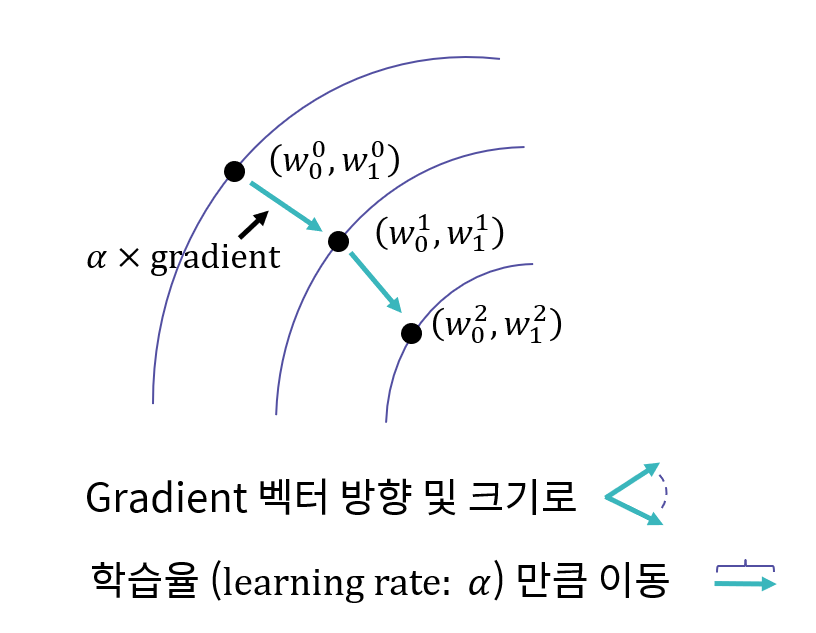

위 그림과 같이 시작점에서의 좌표가 $(w_{0}^{0}, w_{1}^{0})$라 한다면 gradient 방향 및 크기에 학습율을 곱한 만큼 이동합니다.

$w_0$는 y절편, $w_1$는 기울기에 해당됩니다.

학습율은 갑자기 왜 등장했을까요?

gradient는 방향을 알려주지만 어느정도의 크기도 가지고 있습니다.

gradient의 크기는 가끔씩 너무 크거나 작아서 이동 거리가 너무 적거나 너무 커지는 경우가 발생하기에 이를 조절하고자 크기를 조절할 수 있는 학습율을 곱합니다.

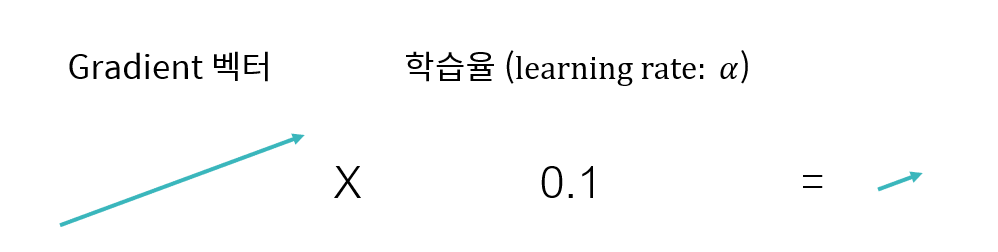

이제 시작점에서 이동한 좌표를 계산해 보겠습니다.

##### 시작점에서 이동한 좌표 계산

> $$[w_{0}^{1}, w_{1}^{1}] = [w_{0}^{0}, w_{1}^{0}] - \alpha \triangledown Loss(w_{0}^{0}, w_{1}^{0})$$

첫 번째 업데이트가 진행 되었으면, 정해진 반복 횟수까지 계속 업데이트를 합니다.

이 과정을 일반화 하면 아래와 같이 표현 됩니다.

##### gradient descent를 사용한 파라미터 업데이트 일반화

> $$[w_{0}^{t+1}, w_{1}^{t+1}] = [w_{0}^{t}, w_{1}^{t}] - \alpha \triangledown Loss(w_{0}^{t}, w_{1}^{t})$$

#### 알고리즘 예시

gradient descent 알고리즘이 실제로 계산되어 지는 과정을 아래의 예시를 통하여 이해해 봅니다.

1. 시작 점의 값을 $w_{0}^{0} = 0 \;$,$w_{1}^{0} = 1$으로 설정합니다. (시작 점 값은 예시 값이고 다양한 값으로 설정 가능함) 

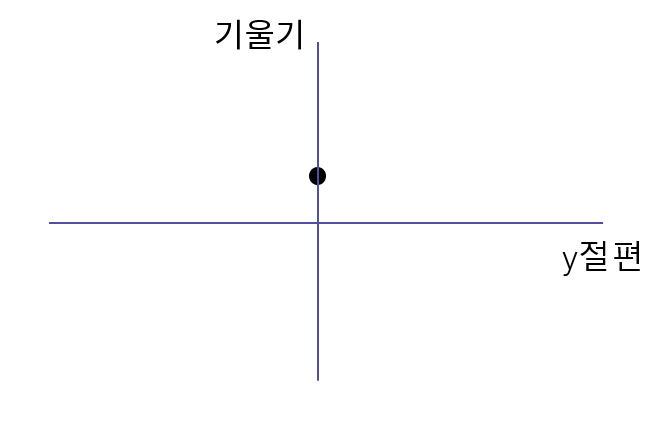

2. 지금 위치에서의 gradient 값을 계산 합니다. 

> $$\triangledown Loss(0,1)=(-1,-2)$$

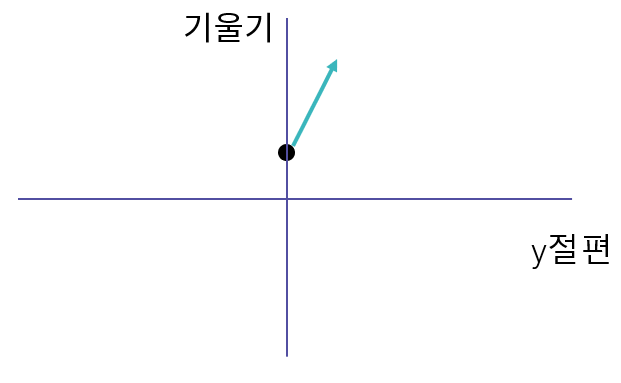

3. y절편, 기울기 업데이트

> $$w_{0}^{1} = w_{0}^{0} - \alpha * (-1), \;\;$ $w_{1}^{1} = w_{1}^{0} - \alpha * (-2)$$

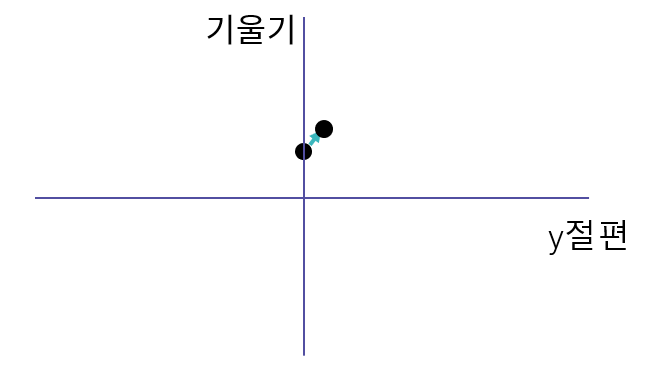

4. 최소 값 위치를 찾을 때까지 2~3 과정 반복

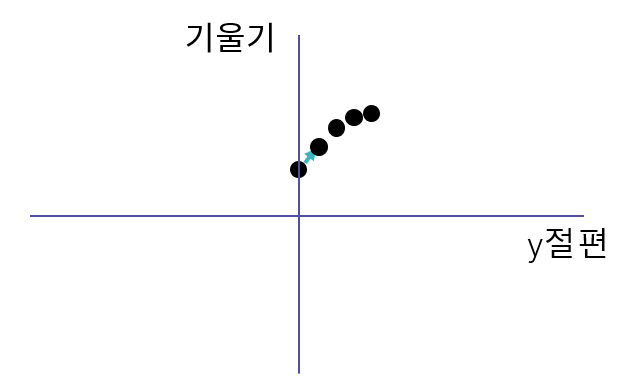

##### <예제 2> gradient descent 알고리즘 구현

`<예제 1>`에 이어서 gradient descent 알고리즘을 완성해 봅시다.

`<예제 1>`에서는 gradient 함수를 구현하였기에 `gradient descent를 사용한 파라미터 업데이트 일반화` 수식을 사용하여 구현합니다.

In [3]:
# 파라미터 초기화
w0 = 0
w1 = 0

# learning rate 설정
lr = 0.001

# 1차 선형 모델 함수 정의
def linear_model(w_0, w_1, feature_data):
    f_x = w_0 + w_1*feature_data
    return f_x

# loss 함수 정의
def loss(f_x, label_data):
    error = label_data - f_x
    ls = np.mean(error**2)
    return ls

# 반복 횟수 1000으로 설정
for i in range(1000):
    gd = gradient(w0,w1,feature_data,label_data)
    w0 = w0 - lr*gd[0]
    w1 = w1 - lr*gd[1]
    
    if (i%100 == 0):
        print("loss : {}".format(loss(linear_model(w0,w1,feature_data),label_data)))
        print("w0, w1 : {}, {}".format(w0,w1))
    



loss : 39.80526573375
w0, w1 : 0.012050000000000002, 0.03505
loss : 1.4088818550020328
w0, w1 : 0.5956839328965645, 1.7137245928510965
loss : 0.08492622860667261
w0, w1 : 0.7129266308916146, 2.0222518370363343
loss : 0.03808809478420731
w0, w1 : 0.7433441610180002, 2.0765698140220747
loss : 0.03531467697283942
w0, w1 : 0.7573915882750667, 2.0837935212742202
loss : 0.03412659366543372
w0, w1 : 0.7681528769083021, 2.0823608526346415
loss : 0.033056629416450725
w0, w1 : 0.7780637167868475, 2.079403378165377
loss : 0.032050551054706465
w0, w1 : 0.787583266851497, 2.0762423007849082
loss : 0.031103013292289844
w0, w1 : 0.7968036334081118, 2.0731204929145344
loss : 0.030210557013104773
w0, w1 : 0.8057485947959019, 2.070080758386106
